# <div align="center">CP421 Data Mining - Assignment 2</div>
### <div align="center">Due Date: Nov 6, 2023 at 11:59 PM</div>

#### Imports:

In [2]:
import numpy as np
import pandas as pd
import csv
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twbm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\twbm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\twbm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Text Preprocessing

#### 1. Tokenization 
Tokenization refers to the process of breaking down a piece of text into smaller units, commonly known as tokens. Typically, tokens are words, but they can also be phrases, sentences, or any other unit that makes sense for the specific analysis. Tokenization is essential because it helps convert the unstructured form of textual data into a form that can be utilized in various Natural Language Processing (NLP) tasks.

In [3]:
filename = 'bbc-news-data-modified.csv'

df = pd.read_csv(filename)

df['Tokens'] = df['title'] + ' ' + df['content']

tokens = df['Tokens'].str.split()
print(tokens)

0       [Ad, sales, boost, Time, Warner, profit, Quart...
1       [Dollar, gains, on, Greenspan, speech, The, do...
2       [Yukos, unit, buyer, faces, loan, claim, The, ...
3       [High, fuel, prices, hit, BA's, profits, Briti...
4       [Pernod, takeover, talk, lifts, Domecq, Shares...
                              ...                        
2220    [BT, program, to, beat, dialler, scams, BT, is...
2221    [Spam, e-mails, tempt, net, shoppers, Computer...
2222    [Be, careful, how, you, code, A, new, European...
2223    [US, cyber, security, chief, resigns, The, man...
2224    [Losing, yourself, in, online, gaming, Online,...
Name: Tokens, Length: 2225, dtype: object


#### 2. Stop Words Removal 
Stop words removal are commonly used words in any language which don’t add much meaning to a sentence. Words like ‘and’, ‘the’, ‘is’, and ‘in’ are examples of stop words. In text mining and search engines, these words are eliminated from the text to expedite the processing.

In [4]:
stop_words = set(stopwords.words('english'))
tokens = tokens.apply(lambda words: [word for word in words if word.lower() not in stop_words])
# Now, df contains the 'Words' column with stop words removed
print(tokens)

0       [Ad, sales, boost, Time, Warner, profit, Quart...
1       [Dollar, gains, Greenspan, speech, dollar, hit...
2       [Yukos, unit, buyer, faces, loan, claim, owner...
3       [High, fuel, prices, hit, BA's, profits, Briti...
4       [Pernod, takeover, talk, lifts, Domecq, Shares...
                              ...                        
2220    [BT, program, beat, dialler, scams, BT, introd...
2221    [Spam, e-mails, tempt, net, shoppers, Computer...
2222    [careful, code, new, European, directive, coul...
2223    [US, cyber, security, chief, resigns, man, mak...
2224    [Losing, online, gaming, Online, role, playing...
Name: Tokens, Length: 2225, dtype: object


#### 3. Lemmatization and Stemming 
Lemmatization and stemming involves converting a word to its base or dictionary form. For instance, ‘running’ becomes ‘run’, ‘better’ becomes ‘good’.

In [5]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

tokens = tokens.apply(lambda words: [stemmer.stem(lemmatizer.lemmatize(word)) for word in words])
print(tokens)

0       [ad, sale, boost, time, warner, profit, quarte...
1       [dollar, gain, greenspan, speech, dollar, hit,...
2       [yuko, unit, buyer, face, loan, claim, owner, ...
3       [high, fuel, price, hit, ba', profit, british,...
4       [pernod, takeov, talk, lift, domecq, share, uk...
                              ...                        
2220    [bt, program, beat, dialler, scam, bt, introdu...
2221    [spam, e-mail, tempt, net, shopper, comput, us...
2222    [care, code, new, european, direct, could, put...
2223    [us, cyber, secur, chief, resign, man, make, s...
2224    [lose, onlin, game, onlin, role, play, game, t...
Name: Tokens, Length: 2225, dtype: object


#### 4. Vectorizerization
Vectorizerization can be used to transform the text data into a matrix of TF-IDF features. This matrix serves as the input for the clustering algorithms, enabling them to cluster the documents based on the significance and occurrence of terms within them

In [6]:
documents = [' '.join(doc) for doc in tokens]

print(documents[0])

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform the 'Words' column
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

print(tfidf_matrix.shape)

# Convert the TF-IDF matrix to a DataFrame
text = pd.DataFrame(data=tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Now, print your DataFrame
print(text.head())



ad sale boost time warner profit quarterli profit us medium giant timewarn jump 76% $1.13bn (£600m) three month december, $639m year-earlier. firm, one biggest investor google, benefit sale high-spe internet connect higher advert sales. timewarn said fourth quarter sale rose 2% $11.1bn $10.9bn. profit buoy one-off gain offset profit dip warner bros, le user aol. time warner said friday own 8% search-engin google. internet business, aol, mix fortunes. lost 464,000 subscrib fourth quarter profit lower preced three quarters. however, compani said aol' underli profit except item rose 8% back stronger internet advertis revenues. hope increas subscrib offer onlin servic free timewarn internet custom tri sign aol' exist custom high-spe broadband. timewarn also restat 2000 2003 result follow probe us secur exchang commiss (sec), close concluding. time warner' fourth quarter profit slightli better analysts' expectations. film divis saw profit slump 27% $284m, help box-offic flop alexand catwoma

### Models

#### 1. K-means Clustering: 
With the processed text, segregate the news articles into 5 distinct clusters using the K-means algorithm.

In [7]:
kmeans = KMeans(init="random", n_clusters=5, random_state=0).fit(text)
print(kmeans.labels_)

C:\Users\twbm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 ... 3 3 0]


##### 1) Report the number of articles encapsulated in each cluster

In [23]:
cluster_labels = kmeans.labels_
cluster_counts = Counter(cluster_labels)

# Print the number of articles in each cluster
for cluster_label, count in cluster_counts.items():
    print(f'Cluster {cluster_label}: {count} articles')

Cluster 1: 479 articles
Cluster 3: 740 articles
Cluster 2: 303 articles
Cluster 0: 511 articles
Cluster 4: 192 articles


##### 2) Illustrate the clusters derived from every clustering technique, employing PCA condensed to 2 components. Plot these clusters after dimensionality reduction.

           000  000m   05        10  100  100m  102  104  10bn  10th  ...  \
0     0.027281   0.0  0.0  0.028604  0.0   0.0  0.0  0.0   0.0   0.0  ...   
1     0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
2     0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
3     0.022699   0.0  0.0  0.023800  0.0   0.0  0.0  0.0   0.0   0.0  ...   
4     0.000000   0.0  0.0  0.047539  0.0   0.0  0.0  0.0   0.0   0.0  ...   
...        ...   ...  ...       ...  ...   ...  ...  ...   ...   ...  ...   
2220  0.055441   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
2221  0.027859   0.0  0.0  0.029209  0.0   0.0  0.0  0.0   0.0   0.0  ...   
2222  0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
2223  0.000000   0.0  0.0  0.000000  0.0   0.0  0.0  0.0   0.0   0.0  ...   
2224  0.007667   0.0  0.0  0.032154  0.0   0.0  0.0  0.0   0.0   0.0  ...   

       yugansk  yuganskneftega  yuganskneftegas      yuko     yukos  \
0   

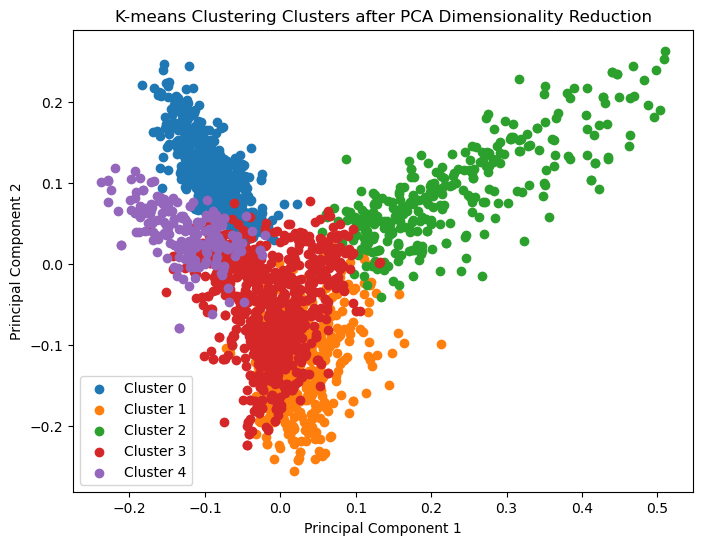

In [12]:
pca = PCA(n_components=2)
text_pca = pca.fit_transform(text)

print(text)
print(text_pca[0,0])

plt.figure(figsize=(8, 6))
for cluster in range(5):  
    plt.scatter(text_pca[kmeans.labels_ == cluster, 0],
                text_pca[kmeans.labels_ == cluster, 1], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering Clusters after PCA Dimensionality Reduction')

plt.legend()
plt.show()

##### 4) Utilize the WCSS method to identify the ideal number of clusters k for the K-means algorithm

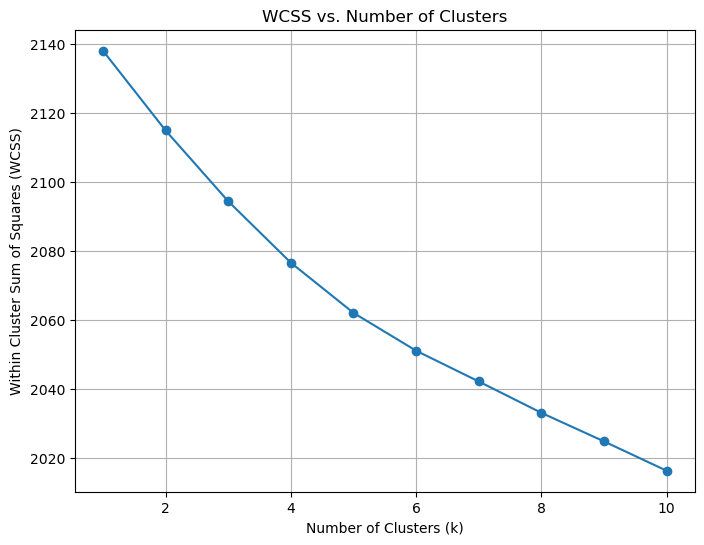

In [20]:
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(text)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

#### 2. DBSCAN Clustering: 
Utilize the preprocessed text and implement the DBSCAN clustering algorithm.

In [ ]:
dbs = DBSCAN(eps=0.03, min_samples=2).fit(text)
labels = dbs.labels_
print(labels)

In [ ]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

#### 3. Gaussian Mixture Model (GMM) Clustering: 
Allocate the news articles into 5 clusters leveraging the Gaussian Mixture Model.

In [13]:
gmm = GaussianMixture(n_components=5, random_state=0).fit(text.values)
cluster_assignments = gmm.predict(text.values)
cluster_counts = Counter(cluster_assignments)

##### 1) Report the number of articles encapsulated in each cluster

In [14]:
# Display the number of points in each cluster
for cluster, count in cluster_counts.items():
    print(f"Cluster {cluster}: {count} articles")

Cluster 1: 819 articles
Cluster 3: 354 articles
Cluster 4: 206 articles
Cluster 0: 345 articles
Cluster 2: 501 articles


##### 2) Illustrate the clusters derived from every clustering technique, employing PCA condensed to 2 components. Plot these clusters after dimensionality reduction.

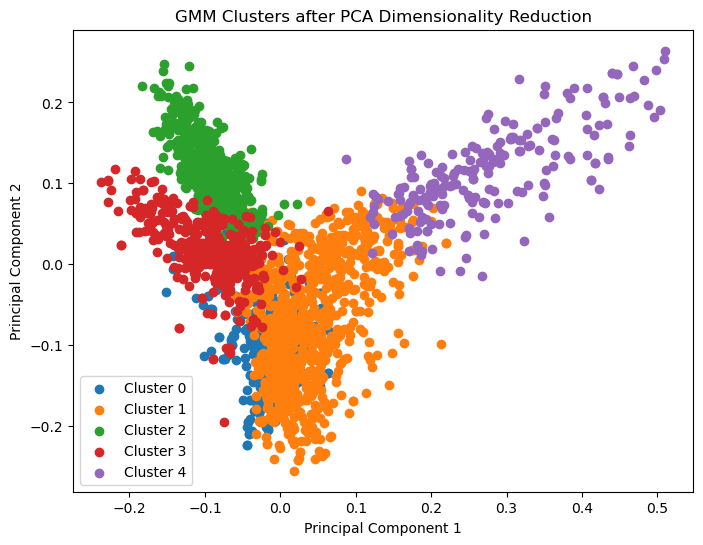

In [15]:
pca = PCA(n_components=2)
text_pca = pca.fit_transform(text.values)

plt.figure(figsize=(8, 6))
for cluster in range(5):  # Assuming you have 5 clusters
    plt.scatter(text_pca[cluster_assignments == cluster, 0],
                text_pca[cluster_assignments == cluster, 1], label=f'Cluster {cluster}')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clusters after PCA Dimensionality Reduction')

# Show the legend
plt.legend()

# Show the plot
plt.show()

#### 4. Agglomerative Clustering: 
Administer Agglomerative Clustering on the processed text, aiming to form 5 Coherent Clusters

In [11]:
Agg_clustering = AgglomerativeClustering(n_clusters = 5).fit(text)

##### 1) Report the number of articles encapsulated in each cluster

In [12]:
cluster_labels = Agg_clustering.labels_
cluster_counts = Counter(cluster_labels)

# Print the number of articles in each cluster
for cluster_label, count in cluster_counts.items():
    print(f'Cluster {cluster_label}: {count} articles')

Cluster 0: 1052 articles
Cluster 4: 343 articles
Cluster 2: 158 articles
Cluster 1: 492 articles
Cluster 3: 180 articles


##### 2) Illustrate the clusters derived from every clustering technique, employing PCA condensed to 2 components. Plot these clusters after dimensionality reduction.

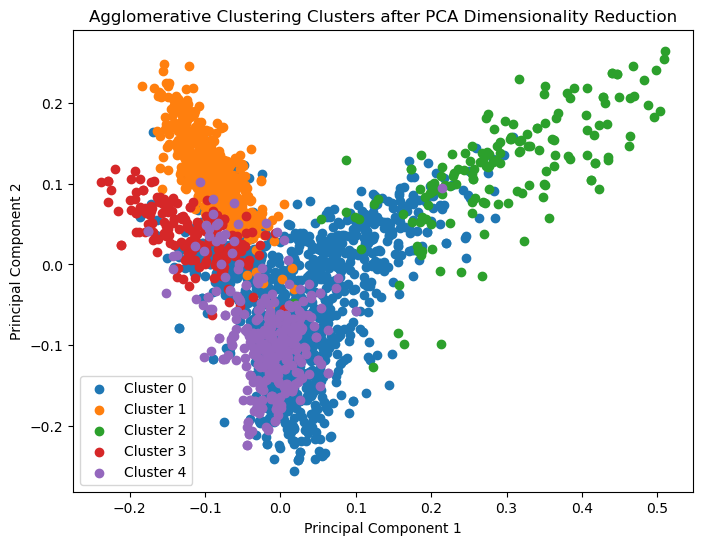

In [14]:
pca = PCA(n_components=2)
text_pca = pca.fit_transform(text)

plt.figure(figsize=(8, 6))
for cluster in range(5):  
    plt.scatter(text_pca[Agg_clustering.labels_ == cluster, 0],
                text_pca[Agg_clustering.labels_ == cluster, 1], label=f'Cluster {cluster}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Agglomerative Clustering Clusters after PCA Dimensionality Reduction')

plt.legend()
plt.show()